# Time Series!

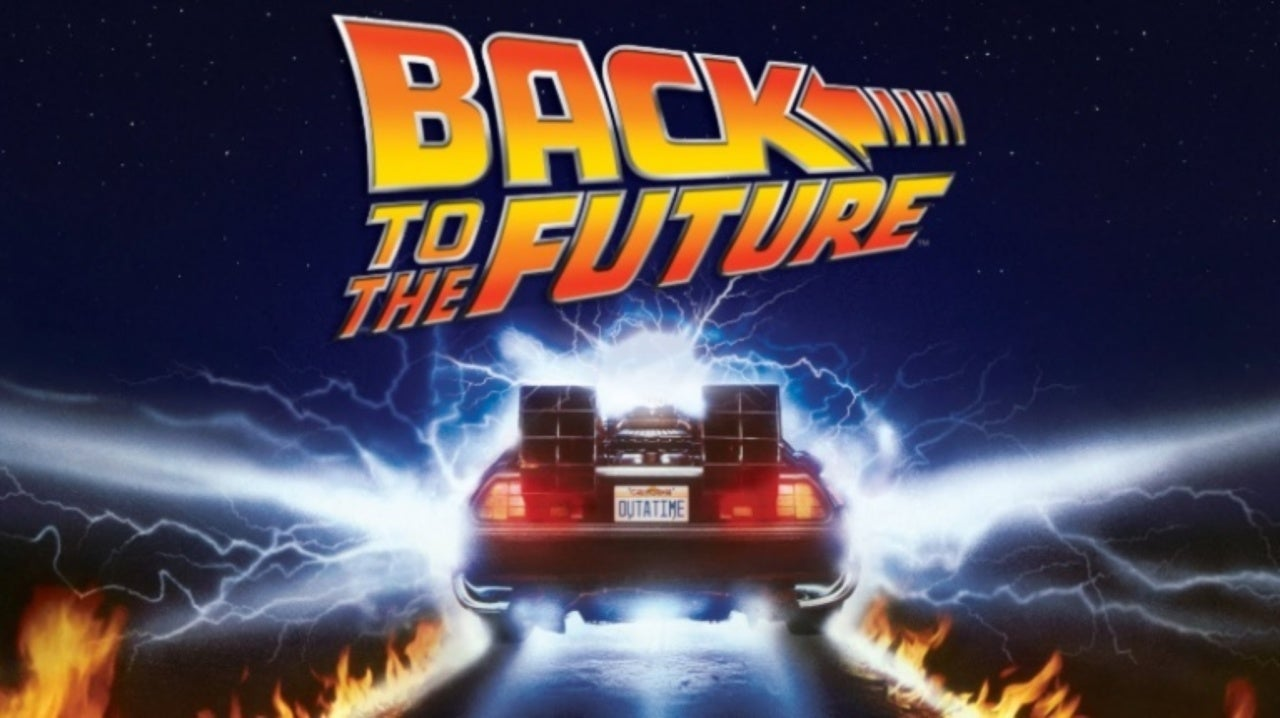

## What is Time Series? Or why I can't just use regression?
Well! Maybe you can!
Let's review our 5 rules of Linear Regression
1. No Perfect Multicollinearity
2. Linear Relationship between Data
3. Errors are Normally Distributed
4. Errors do not change over time (Homoscedasticity)
5. **Autocorrelation -> What does this mean!!!!**

What is Autocorrelation?

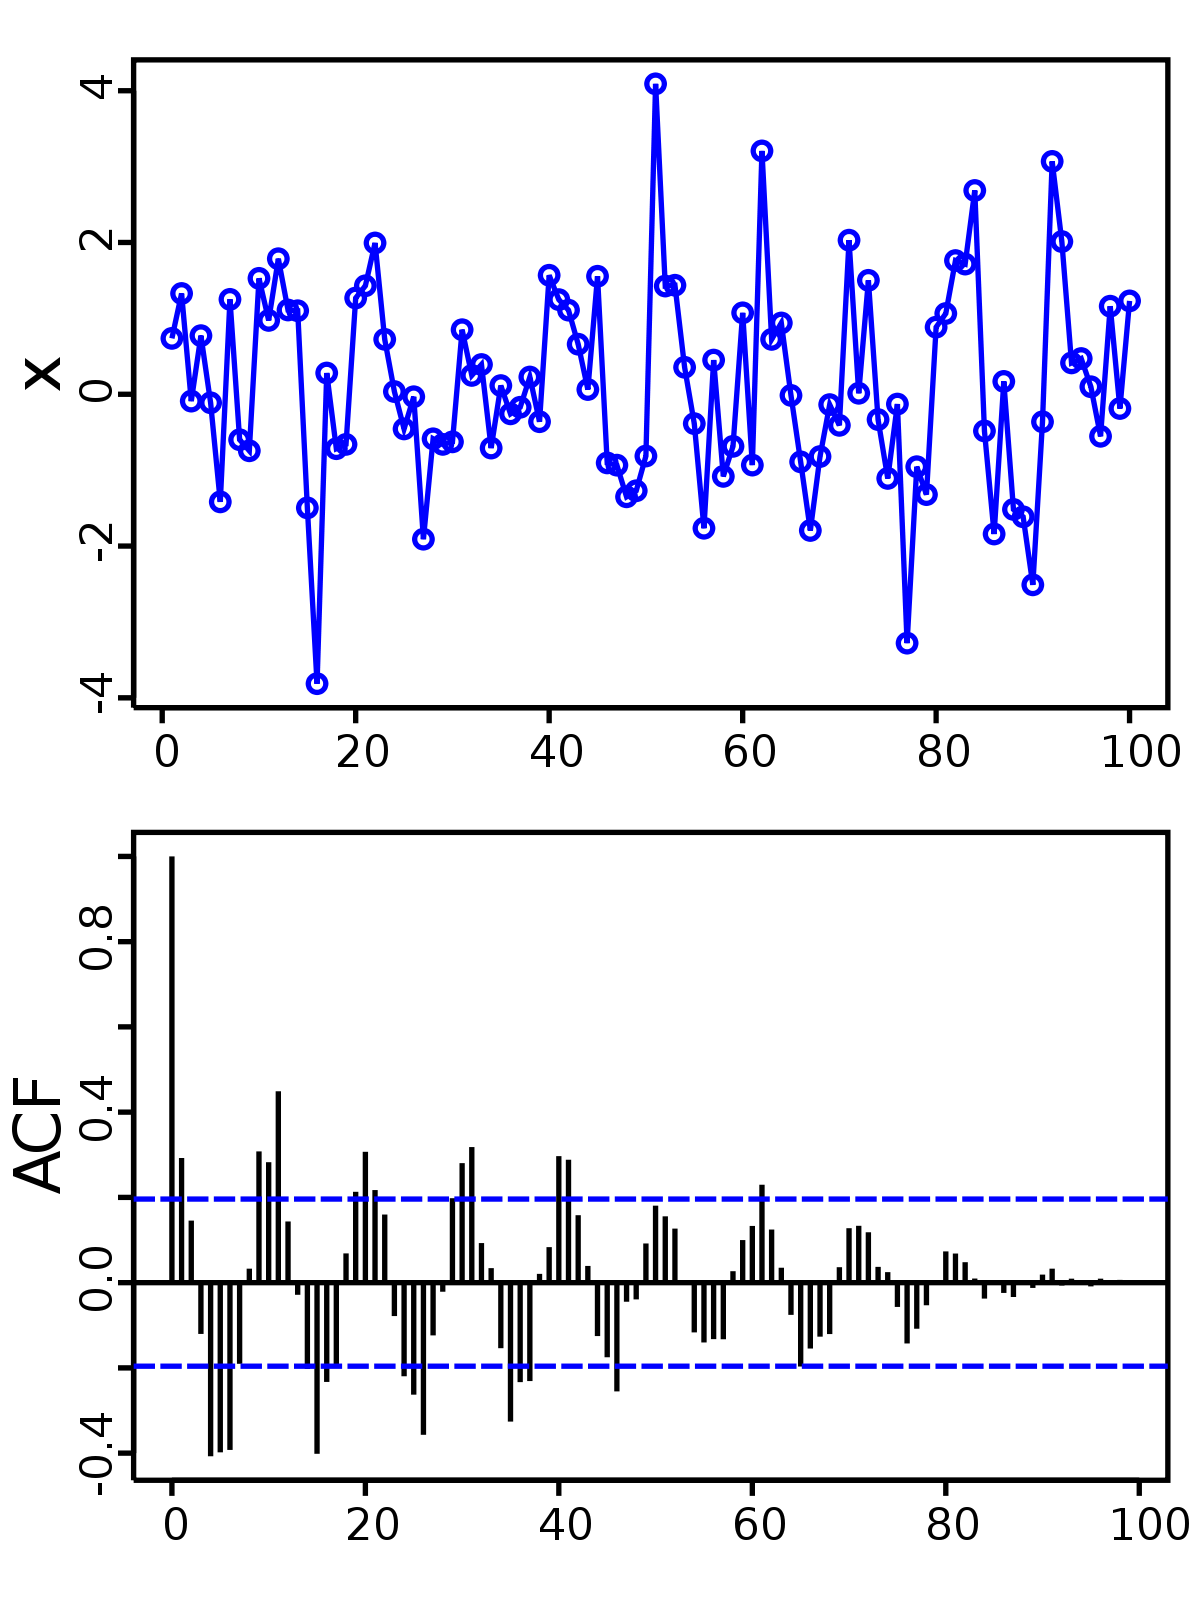

Autocorrelation is the relationship between datapoints at t, and t-1. The majority of the time we will deal with data that isn't collected all at once, and sometimes that temporal aspect can matter a great deal! 

**Which of the following two scenarios would you expect to have autocorrelation?**

A. Data collected on flu cases gathered throughout the year, data includes number of cases, state, temperature, population, air travel rate, hospital count.

B. Data collected on Amazon transactions on Black Friday, data includes shopper demographics, economic status, item purchased, previous search history.

### Now let's define what a time-series function will look like

We can define the function of Yt as a combination of Yt-1 and some error
## $y_t = a + p*y_{t-1} + ε_t$ 

Where y is our time series function, a is our trend and p is our function from the previous time-period

## How can I tell if something should be modeled with a time series function?

So now we intuitively understand when time-series modeling would be appropiate, is there a way to check for autocorrelation?

### Lijung Box Test 

H0: Data Points are Independent

Ha: Data Exhibits Autocorrelation

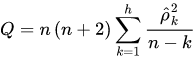


### ACF and PACF Charts

ACF (Definition from Jayesh Salvi)

*"ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’."*

*"PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features."*

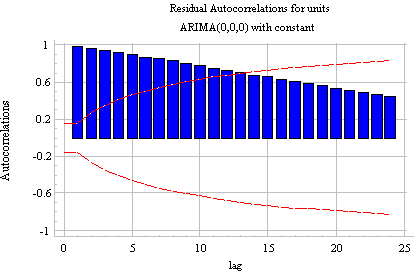

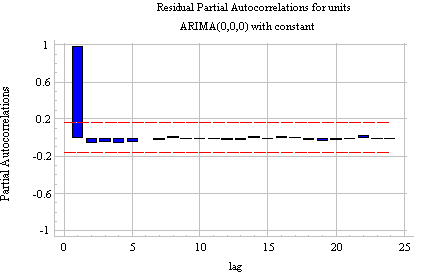

We will come back to these charts- but it's important to start to see time-series data.

## Great! Let's model! How?
Supervised Function! Now we first have to transform our dataset into a prediction of t and t-1. 

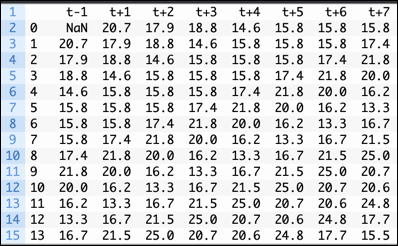

Now we model right?

### Differencing & the Dickey Fuller Test

### Stationary vs Non-Stationary
Before we model we should discuss a concept of stationarary data!

So what is non-stationary vs stationary data?

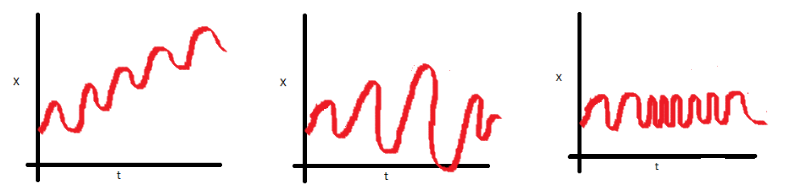

#### Stationary Data is data with a constant variance, mean of zero, no trend or seasonality. 
So why do we care about stationary?  With stationary data we can start to model the relationship between t and t-1. This is the assumption we are about and will have to transform our data to be stationary. How do we transform our data to be stationary? 

To transform our data to be stationary we need to remove the seasonality & trend, and depending on the series we are modeling we have a few options, for this course we will focus on Differencing:

$y_{t‘} = y_{t} – y_{(t-1)}$

### Random Walk
So before we jump into discussions of tests for Stationary Data, let's discuss a Random Walk. This is important because to understand whether we have the ability to predict the future we have to understand the relationbetween the past. A random walk is a process where the future is completely random and the direction the process will go into the future is random as well.

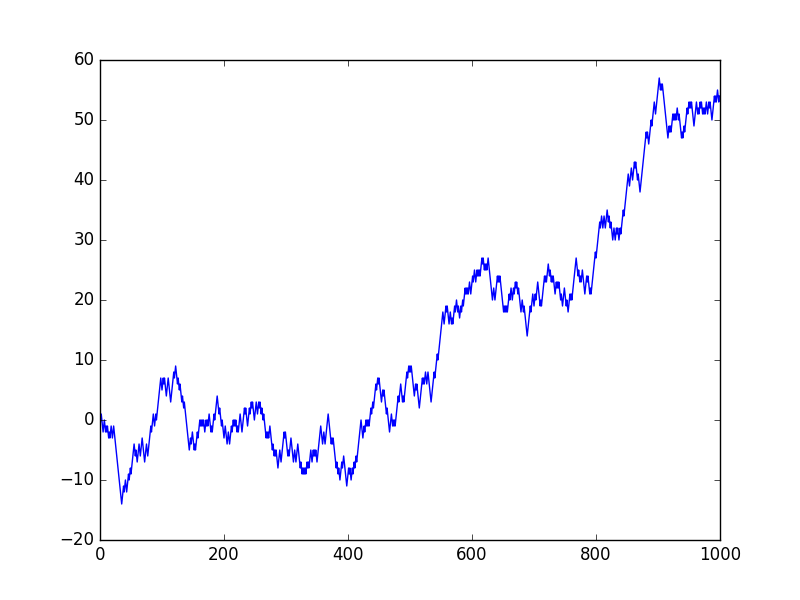

This will become important in a second but a Random Walk has a Unit Root of 1

### Testing for Stationary (Augmented Dickey Fuller)
Several tests exist for stationarity, for this class we will focus on the Augment Dickey Fuller Test *(Fun Fact, Dr. Dickey used to teach at NCSU IAA and helped mentor my time-series practicum project!)*

H0: The series has a unit root

Ha: The series has no unit root

So what does a unit root mean?

### Unit Root
A unit root of 1 is basically means that our data is not predictable, and in the case of a random walk it'll move randomly up or down. By definition, a Random Walk is non-stationary.

So what is the math behind this?

Remember our equation of time-series?

$y_t = a + p*y_{t-1} + ε_t$
We have this term a and if this a term is equal to 1 then our process indicates it's simply a difference in error

Let's dive into this in more detail

$y_t - y_{t-1} = a + (p-1)*y_{t-1} + ε_t$

With an p = 1 we end up with $\Delta y = a + ε_t $ Do we see a problem with this? The delta in y is based purely on the trend and error and the random walk might travel off in a direction infinitely.

This p value is our unit root. Now lets look at the alternative, a p < 1

$\Delta y = a + (p-1)*y_{t-1} + ε_t $
This means our series will revert back to a mean with enoungh of a time-period.

And this is what happens if you difference a Random Walk

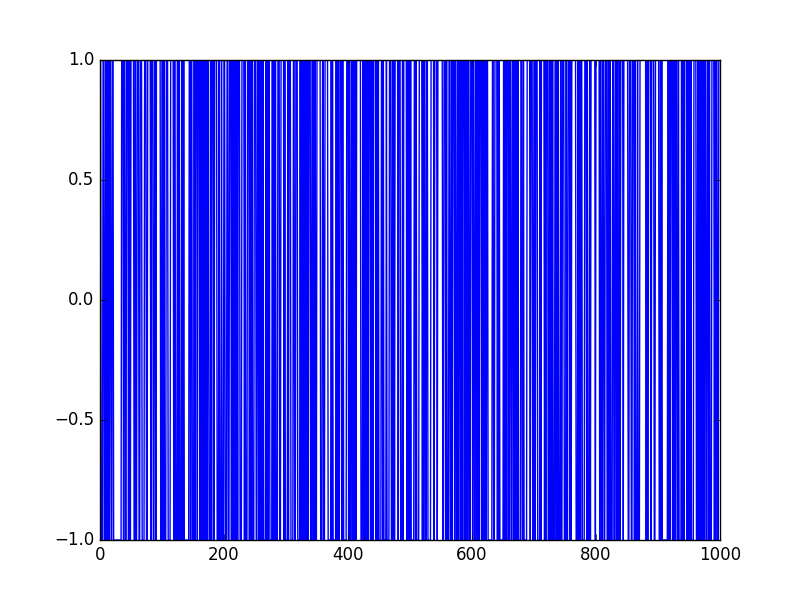

Stocks are a great example of Random Walks

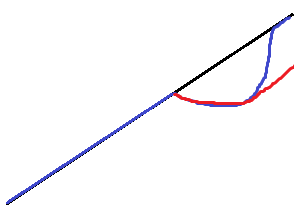

A Random Walk with Drift. The direction is our a term. The recovery line in blue shows the series with no unit root (p < 1), and the red shows a unit root (p = 1). See how the lack of a unit root pushes the time series function back to the mean. Whereas for the random walk the line continues on in a random tangent to the trend.

### So remember!

Unit root means p = 1 (or not significantly different from 1), no unit root means p is significantly different from 1

In [2]:
#define function for ADF test (From AISHWARYA SINGH)
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

ModuleNotFoundError: No module named 'statsmodels'

## So now lets define some additional terms that will often occur in time-series!

### Trend
A general change in the time-series function. A classic trend has been number of flying passengers. A series cannot be stationary with trend! 

### Seasonality
A reoccuring pattern in a time-series function. Think like temperature. A series cannot be stationary with seasonality!

Note you can have multiple seasonalities.

### Noise
The remaining residual. When we have actived white noise we have appropiately modeled our time series function and have removed the trend, seasonality, and correclation between $y_t$ and $y_{t-1}$

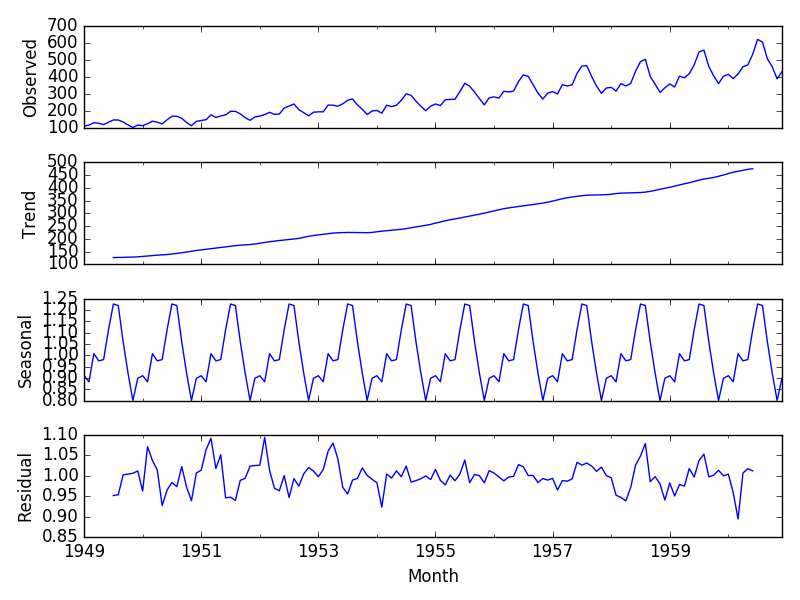

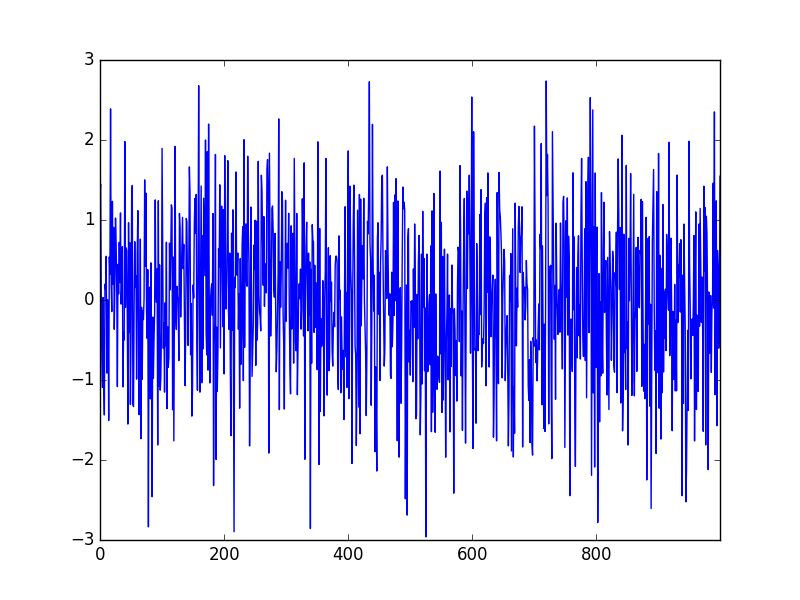

## Models!

### Moving Average vs Moving Average Model vs Autoregressive Model
A moving average model takes m previous time-steps and computes the average of these values. 

$y_t = \frac{t_{t-1} + t_{t-2} + t_{t-m}}{m} $

Which is different than a moving average model where we model a time-series point based on the error from the previous prediction which is defined as 

$y_t = \mu + \varepsilon _{t}+\theta _{1}\varepsilon _{{t-1}}+\cdots +\theta _{q}\varepsilon _{{t-q}} $

and an Autoregressive model uses the previous time points as inputs to a regression such as

$y_t = \delta + \sigma(y_{t-1}) + \sigma(y_{t-2}) + \sigma(y_{t-m}) + A_t$

### Exponential Smoothing Models
Expoential Smoothing models are a family of models built on the concept (discussed above), that $y_t$ has a relationship with $y_{t-1}$. Now since we know this, we would also assume that $y_t$ and $y_{t-2}$ since $y_{t-1}$ has a relationship with $y_{t-2}$

Exponential Smoothing takes the idea of a Moving Average model but decides that we should weigh t_{t-1} higher than t_{t-2}, and so on.

The following chart shows how the different family of exponential smoothing models work, the general idea for these models is that we remove the trend with a holt or brown and seasonlity with winters. And we can combine them to form a holt winters! These models tend to be very good for univariate time-series and short term forecasting.

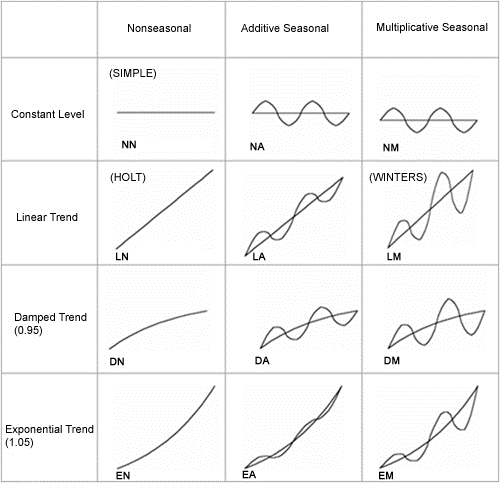


### ARIMA - ARIMAx - Seasonal ARIMA

ARIMA - Auto Regressive Integrated Moving Average models take the components from our described AR and MA models to build long term accurate models. The I stands for integration which is how we achive stationarity - through differencing. 

ARIMA models are extremely versatile and can be extended to include both seasonal components and extraneous variables (ARIMAx). 

Our goal when fitting ARIMA models is to achive white noise, a point at which our residuals are indicating that we have removed and modeled all appropiate 

The general steps to fitting an ARIMA are:
1. Identify if series is a time-series
2. Plot series
3. Confirm that series is non-stationary through testing or rules 
4. Achieve stationary - usually through differencing (FIT ARIMA model with (0,1,0)
5. Confirm series is stationary
6. Review ACF and PACF charts to identify AR and MA terms
7. Fit ARIMA model with (P, D, Q) terms
8. View white noise plots to confirm information has been modeled
9. Review validations statistics and compare candidate modles
10. Remove AR and MA terms that are not significant to improve model validation performance- ensure that white noise is maintained
11. Forecast

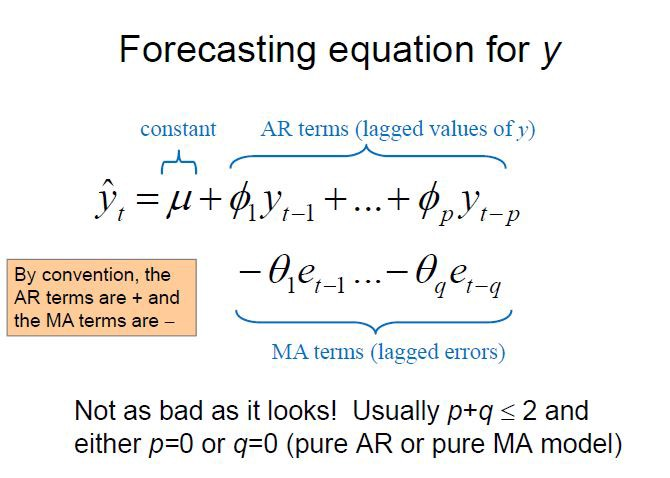

In [1]:
model = ARIMA(series, order=(P, D, Q))
#p: The number of lag observations included in the model, the number of autoregressive effects
#d: The order of differencing
#q: The number of lag errors included in the model, the number of moving average effects

NameError: name 'ARIMA' is not defined

### Validation Metrics
MAPE - Mean Absolute Percent Error

MAE - Mean Absolute Error

RMSE - Root Mean Squared Error

### LSTM Models

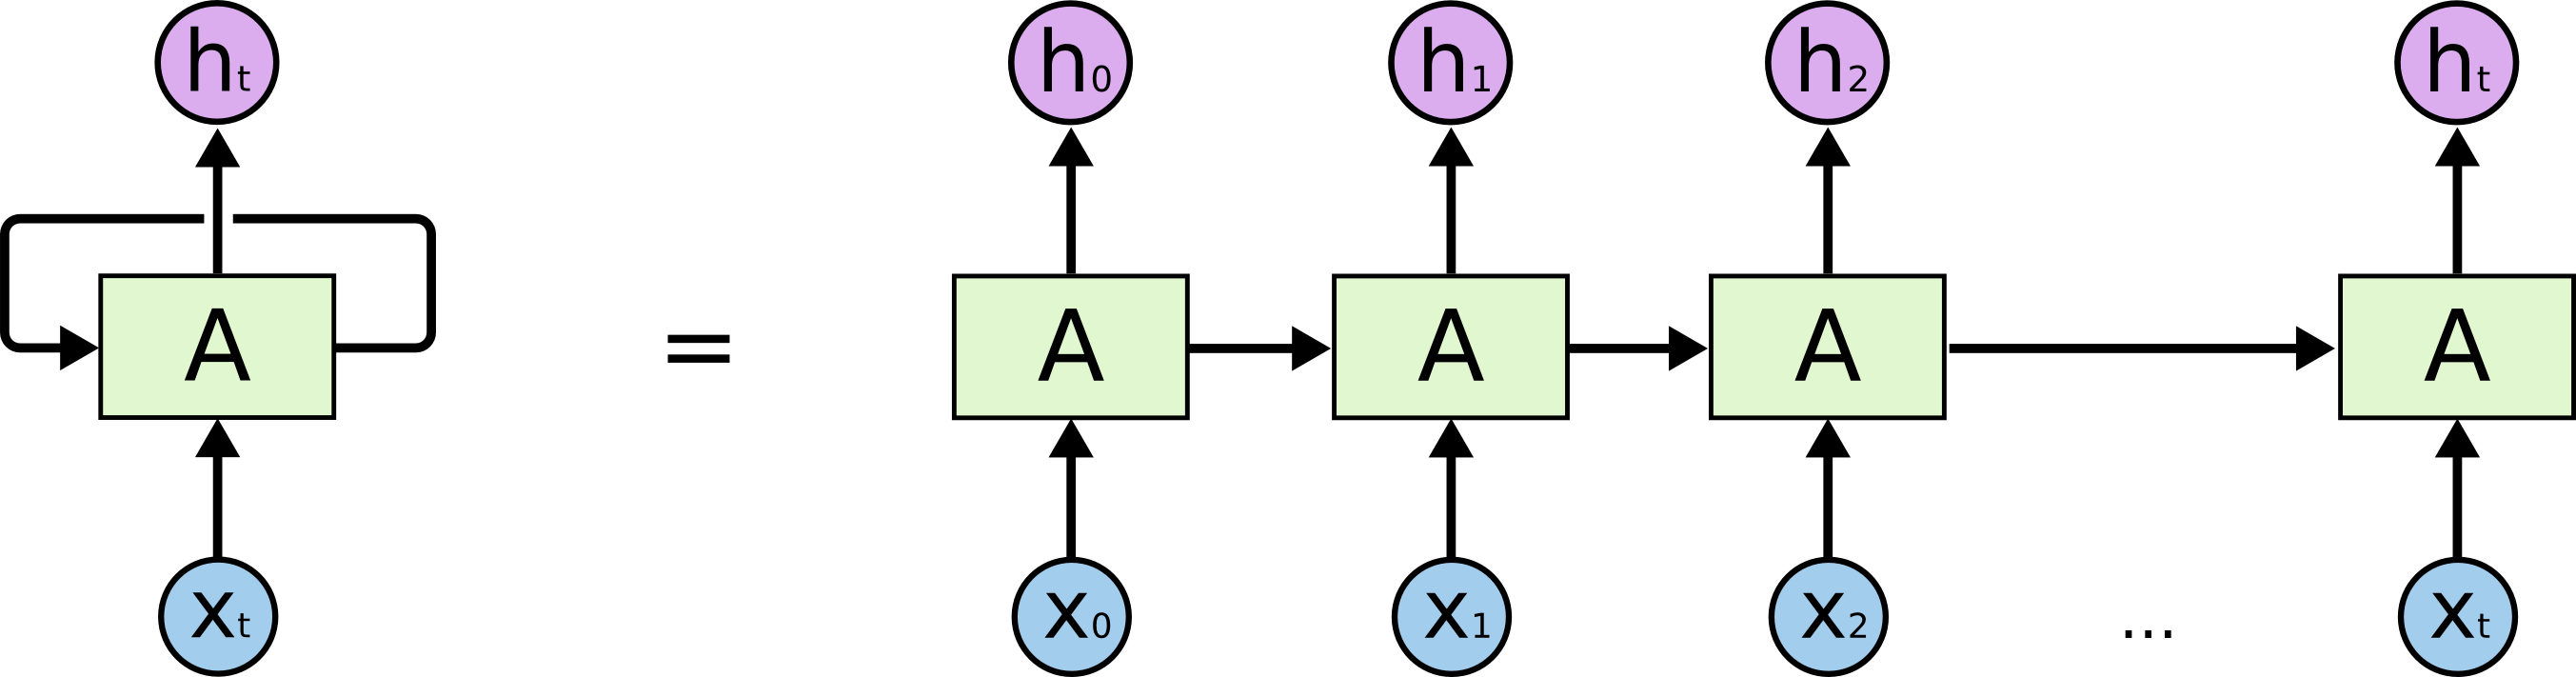

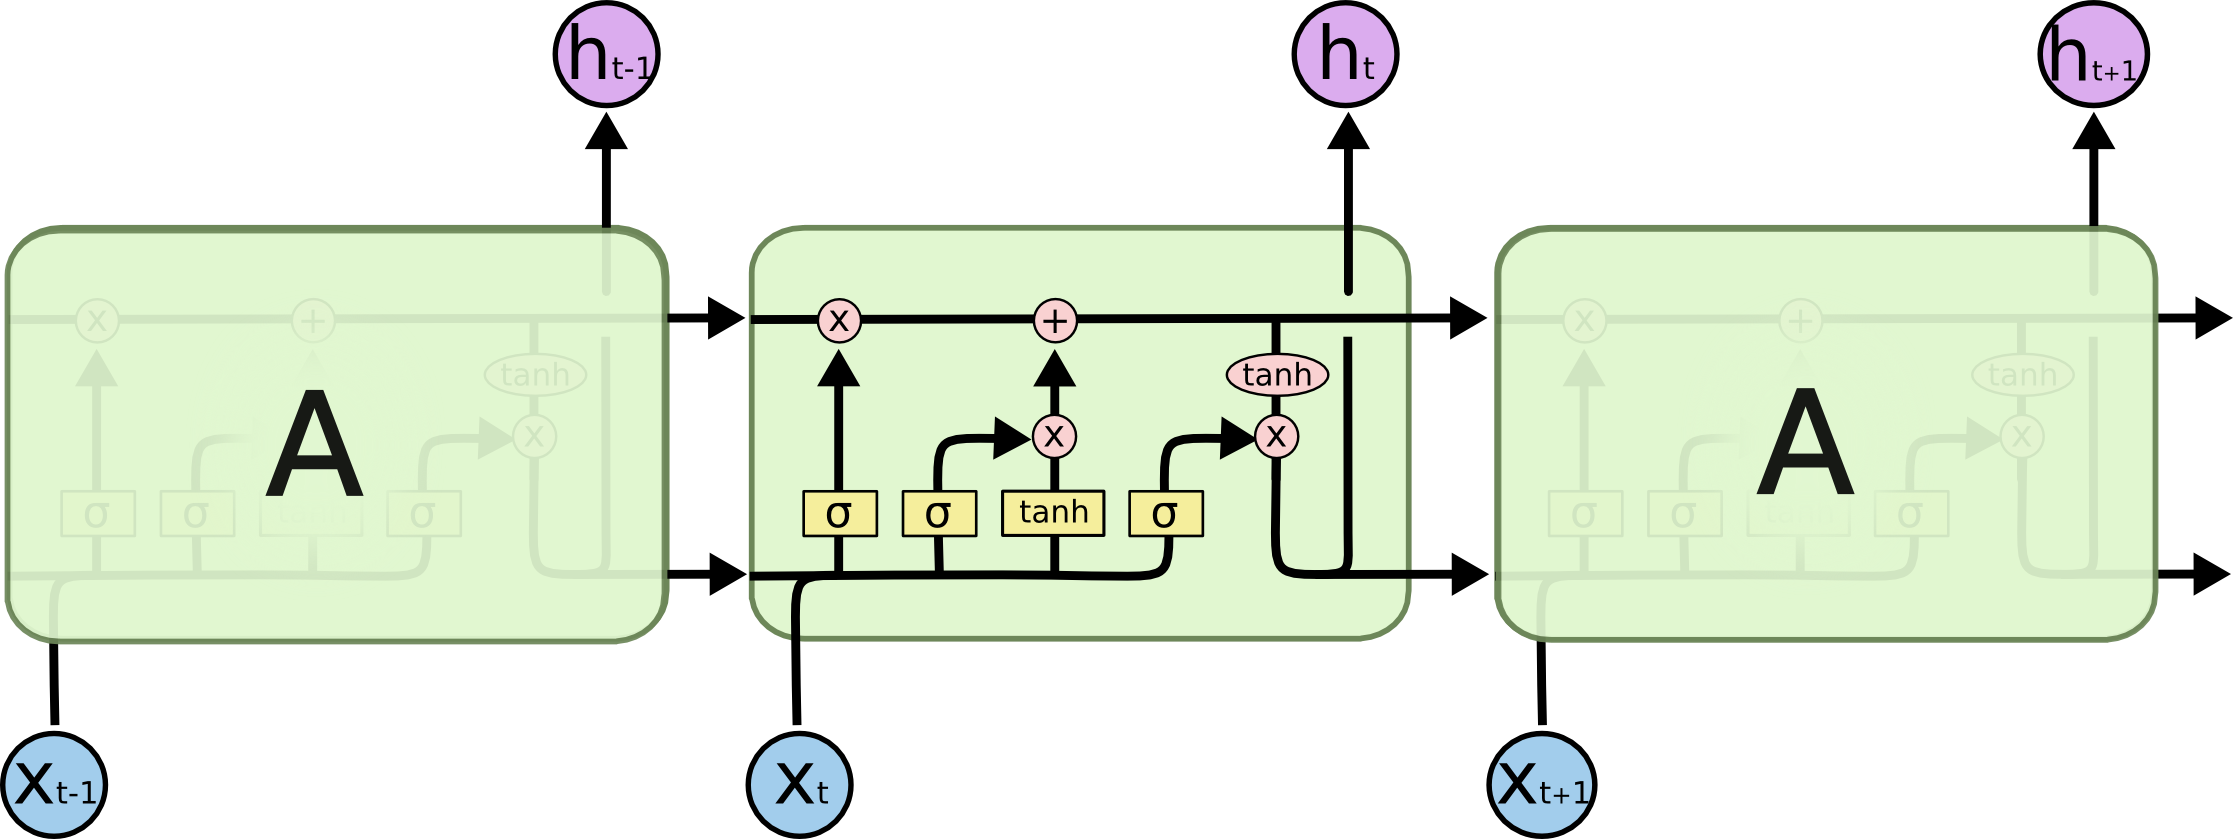

#### References

https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

https://media.comicbook.com/2018/07/back-to-the-future-trilogy-1122951-1280x0.jpeg

https://en.wikipedia.org/wiki/Autocorrelation

https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test

https://people.duke.edu/~rnau/411diff.htm

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

https://machinelearningmastery.com/white-noise-time-series-python/

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

https://people.duke.edu/~rnau/411arim.htm

https://towardsdatascience.com/unboxing-arima-models-1dc09d2746f8

https://otexts.com/fpp2/